# Data—Cleaning：Deal with Missing values

### 1. import libraries and pre-process data

In [1088]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [1089]:
df = pd.read_csv('/Users/keikei/Desktop/HW4_data_clean/weather_madrid_LEMD_1997_2015.csv',parse_dates=True)

In [1090]:
# select a time period (2000-7-1 to 2002-7-1), keep columns
df = df.loc[1198:1911,["CET",'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC']]
# original dataframe
df_total = df.loc[1198:1911,["CET",'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC']]

In [1091]:
# create Na value
random.seed(501)
row_todel_meanT = random.sample(range(1198,1911),100)
df.loc[row_todel_meanT, 'Max TemperatureC'] = np.nan

In [1092]:
df.isna().sum()

CET                    0
Max TemperatureC     102
Mean TemperatureC      3
Min TemperatureC       2
dtype: int64

In [1093]:
# practice: generate a new random range 

random.seed(1001)
row_todel_urchoice = random.sample(range(1198,1911),100)
row_todel_urchoice

[1258,
 1400,
 1291,
 1766,
 1584,
 1362,
 1614,
 1581,
 1775,
 1862,
 1608,
 1783,
 1401,
 1820,
 1249,
 1229,
 1702,
 1869,
 1825,
 1390,
 1712,
 1824,
 1350,
 1217,
 1902,
 1301,
 1849,
 1904,
 1330,
 1300,
 1457,
 1642,
 1805,
 1275,
 1754,
 1767,
 1599,
 1289,
 1511,
 1554,
 1368,
 1607,
 1234,
 1888,
 1295,
 1897,
 1414,
 1203,
 1641,
 1791,
 1543,
 1403,
 1339,
 1749,
 1652,
 1421,
 1785,
 1237,
 1910,
 1577,
 1879,
 1384,
 1315,
 1559,
 1738,
 1420,
 1240,
 1826,
 1873,
 1437,
 1729,
 1803,
 1566,
 1678,
 1219,
 1660,
 1254,
 1329,
 1348,
 1322,
 1684,
 1469,
 1462,
 1296,
 1228,
 1427,
 1316,
 1694,
 1404,
 1768,
 1730,
 1578,
 1308,
 1267,
 1534,
 1739,
 1519,
 1830,
 1226,
 1675]

In [1094]:
df.dtypes

CET                   object
Max TemperatureC     float64
Mean TemperatureC    float64
Min TemperatureC     float64
dtype: object

In [1095]:
df.isnull().sum()

CET                    0
Max TemperatureC     102
Mean TemperatureC      3
Min TemperatureC       2
dtype: int64

<AxesSubplot: xlabel='CET'>

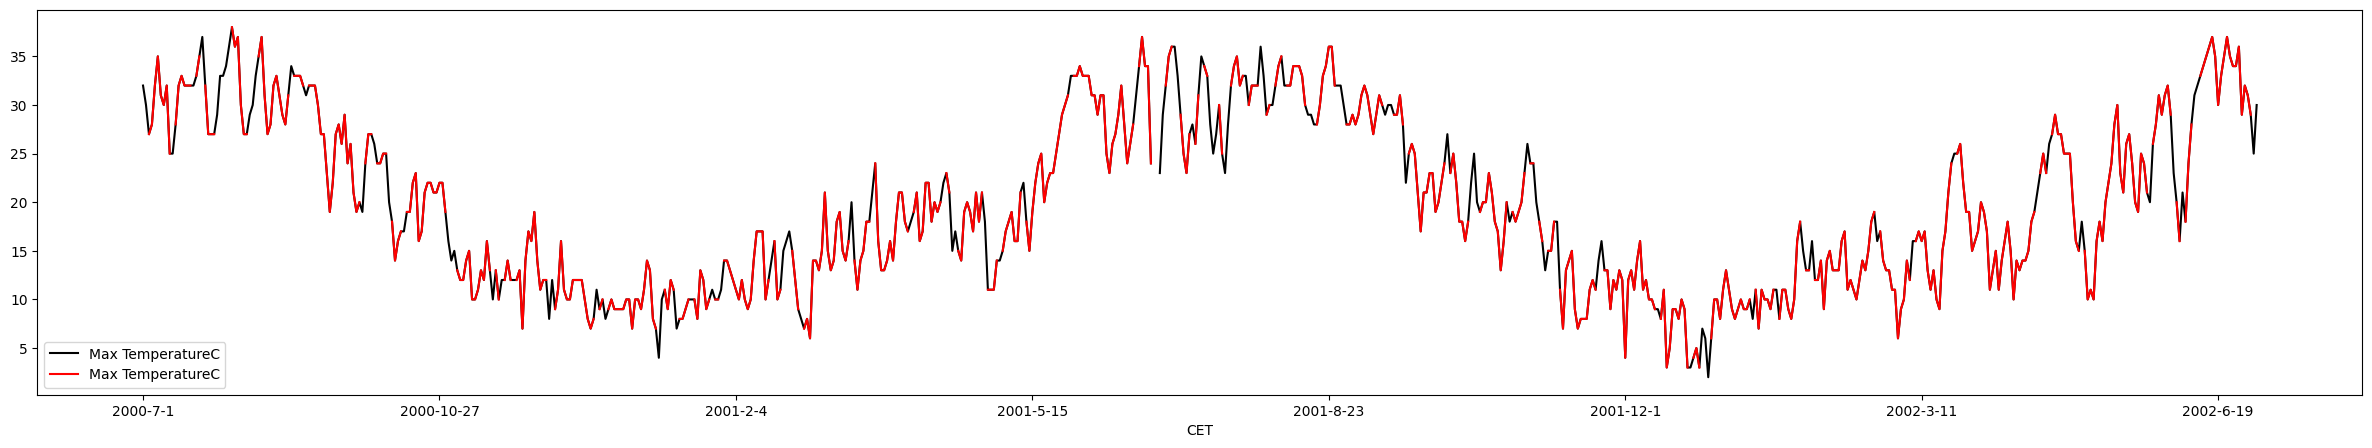

In [1096]:
ax =df_total.plot(x = 'CET', y = 'Max TemperatureC', color='black', figsize=(30, 5))
df.plot(x = 'CET', y = 'Max TemperatureC', color='red', figsize=(30, 5), ax=ax)


### 2. Deal with missing values


1. fillna（）
* ffill/bfill 
* constant
* mean/median/mode

In [1097]:
from sklearn.impute import SimpleImputer

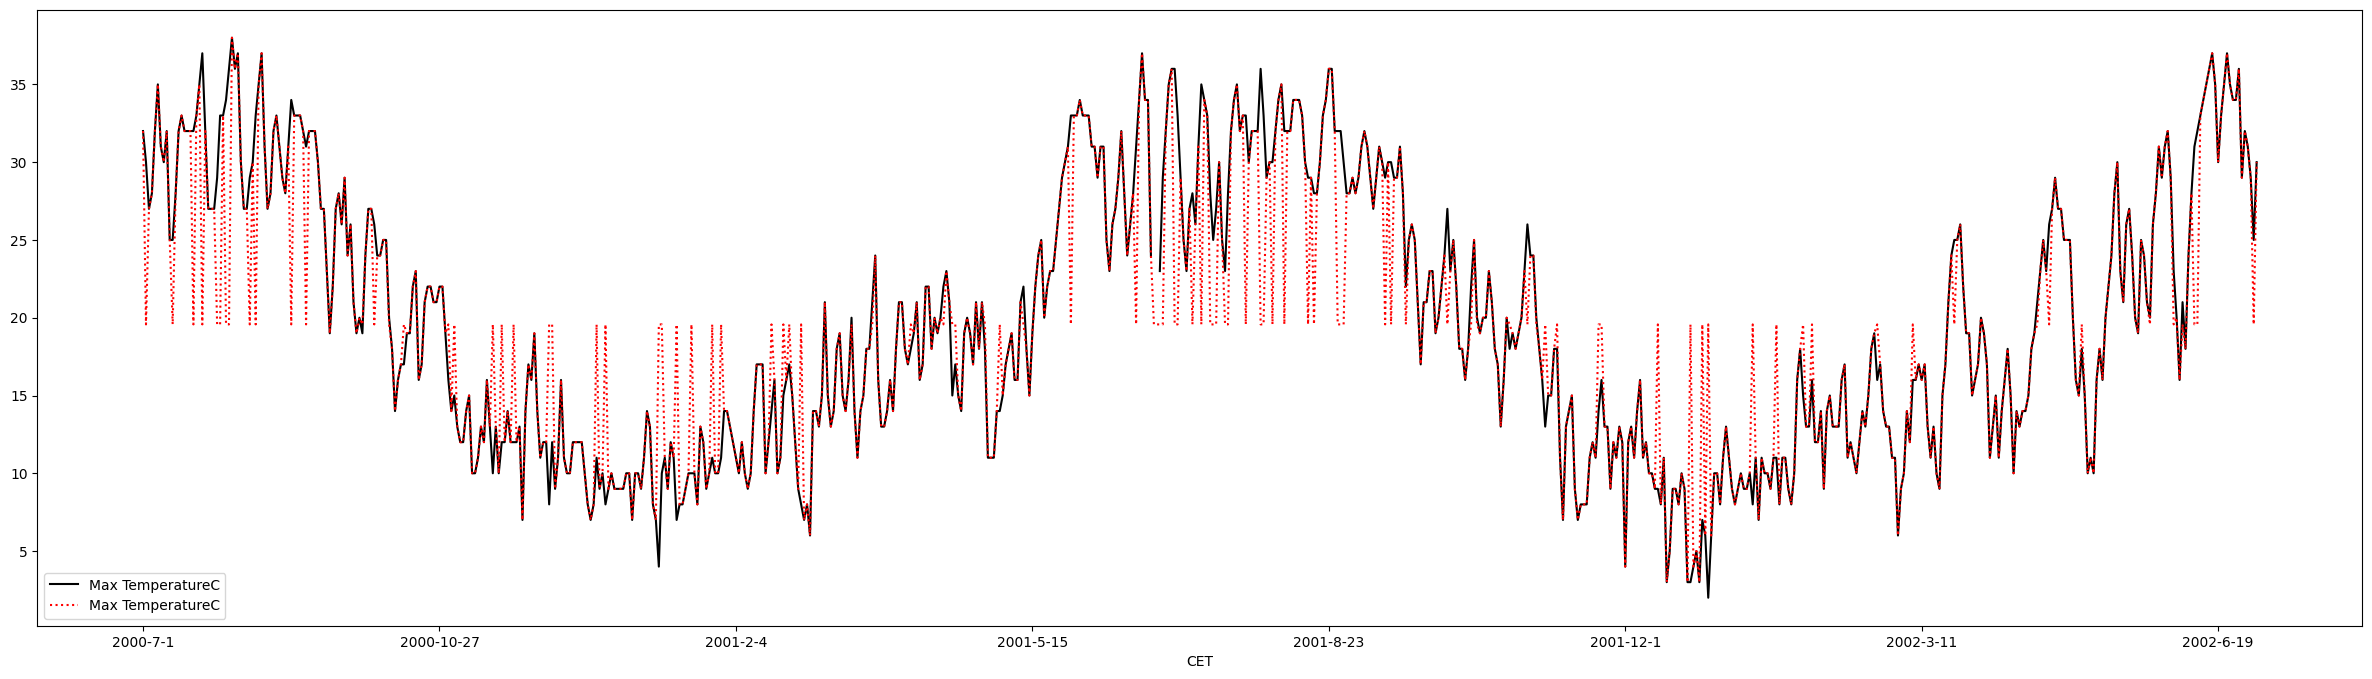

In [1098]:
df_1 = pd.DataFrame()
df_1['CET'] = df['CET']
df_1['Max TemperatureC'] = df['Max TemperatureC'].fillna(df['Max TemperatureC'].mean())
ax = df_total.plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_1.plot(x = 'CET', y = 'Max TemperatureC', color='red',linestyle ='dotted',figsize=(30, 8),ax = ax)
plt.show()

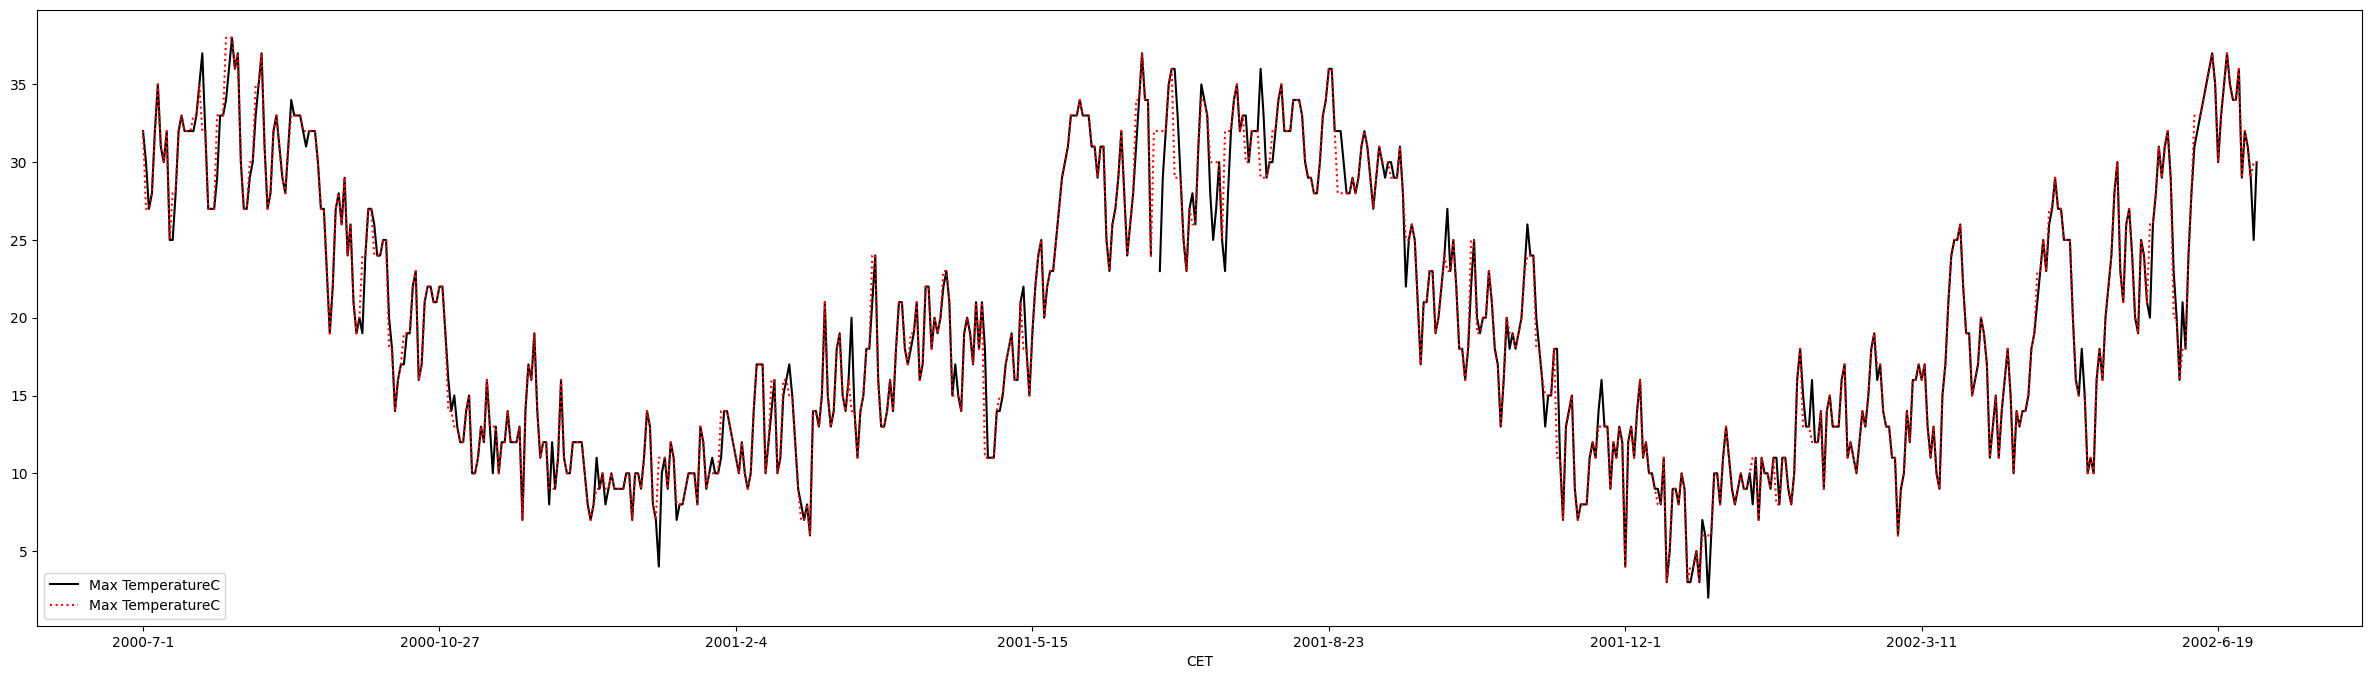

In [1099]:
# bfill/ffill
df_2 = pd.DataFrame()
df_2['CET'] = df['CET']
df_2['Max TemperatureC'] = df['Max TemperatureC'].fillna(method = 'bfill')
ax = df_total.plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_2.plot(x = 'CET', y = 'Max TemperatureC', color='red',linestyle ='dotted',figsize=(30, 8),ax = ax)
plt.show()

2. interpolate()
* linear
* quadratic
* nearest

In [1100]:
linear = df['Max TemperatureC'].interpolate(method='linear')
linear.dtype

dtype('float64')

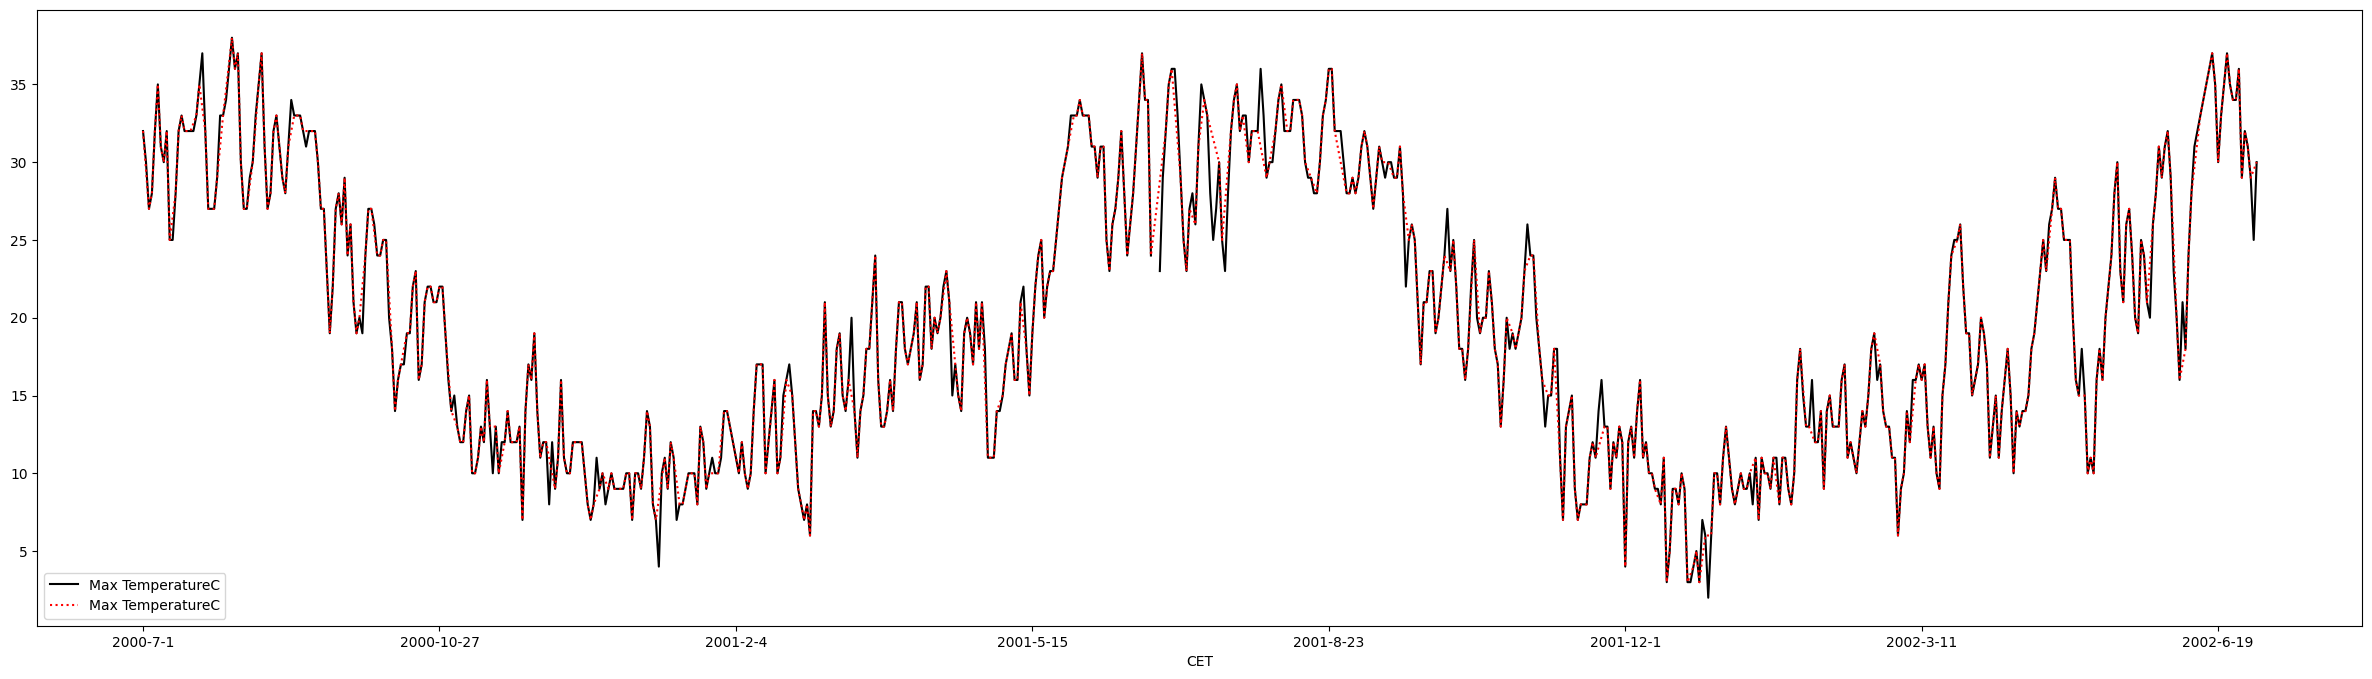

In [1101]:
# linear
df_3 = pd.DataFrame()
df_3[['CET','Max TemperatureC']] = df[['CET','Max TemperatureC']]
df_3['Max TemperatureC'] = df_3['Max TemperatureC'].interpolate(method = 'linear')
ax = df_total.plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_3.plot(x = 'CET', y = 'Max TemperatureC', color='red',linestyle ='dotted',figsize=(30, 8),ax = ax)
plt.show()

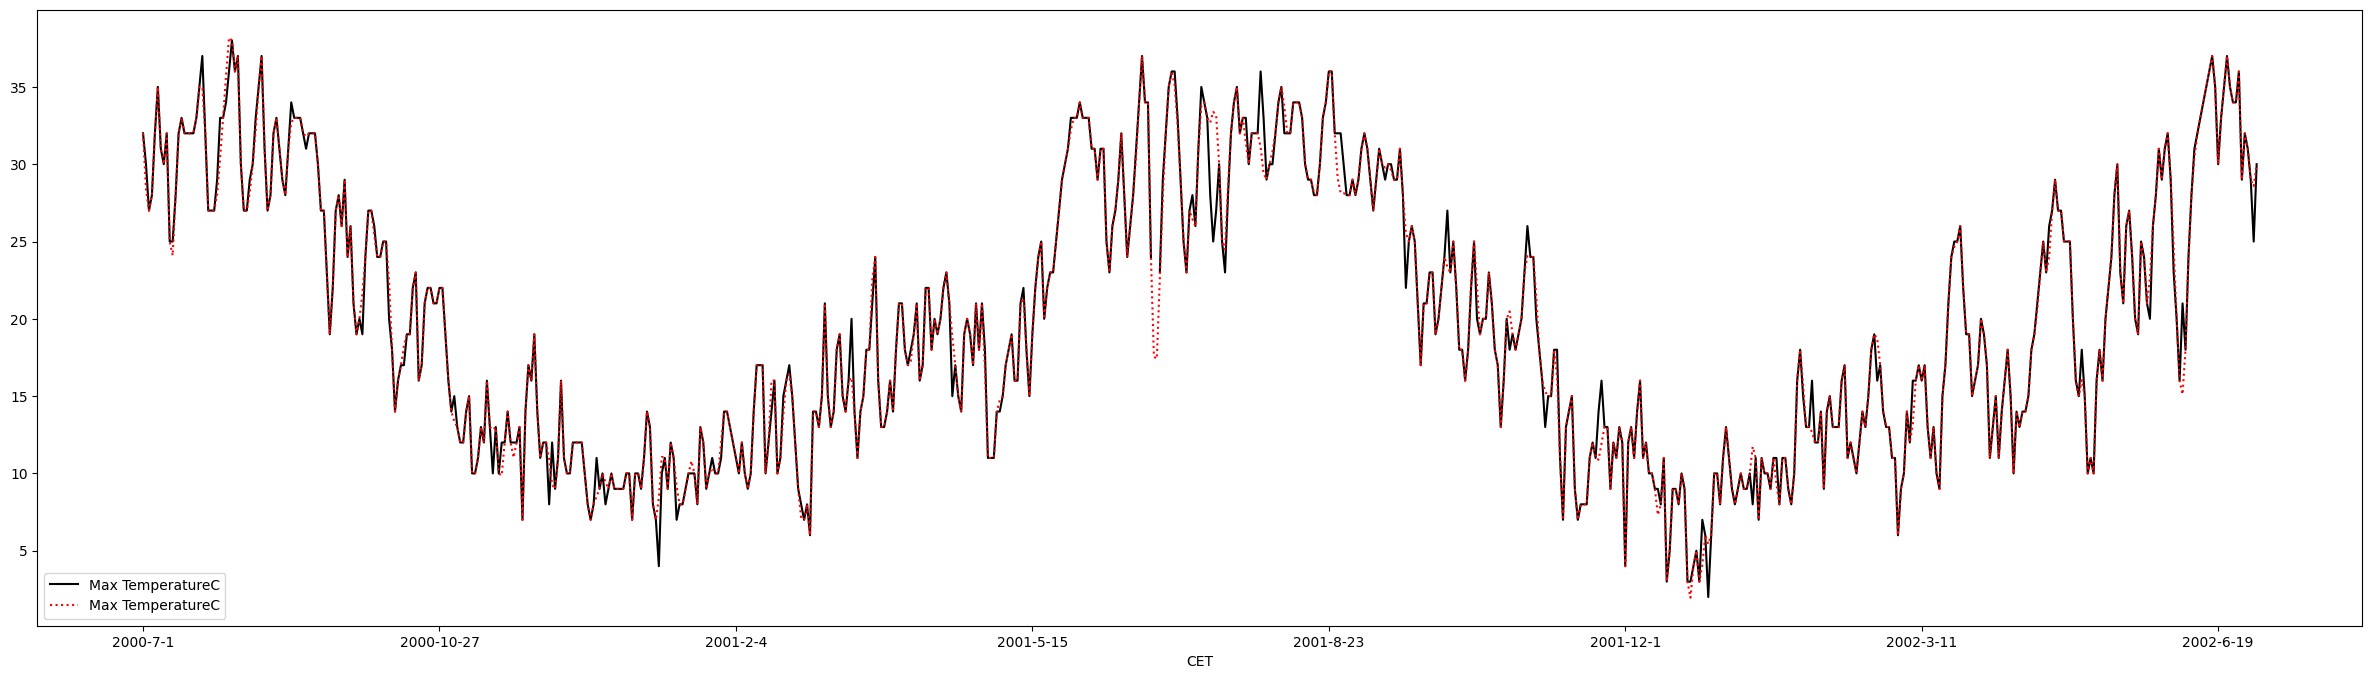

In [1102]:
# quadratic
df_4 = pd.DataFrame()
df_4[['CET','Max TemperatureC']] = df[['CET','Max TemperatureC']]
df_4['Max TemperatureC'] = df_4['Max TemperatureC'].interpolate(method = 'quadratic')
ax = df_total.plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_4.plot(x = 'CET', y = 'Max TemperatureC', color='red',linestyle ='dotted',figsize=(30, 8),ax = ax)
plt.show()

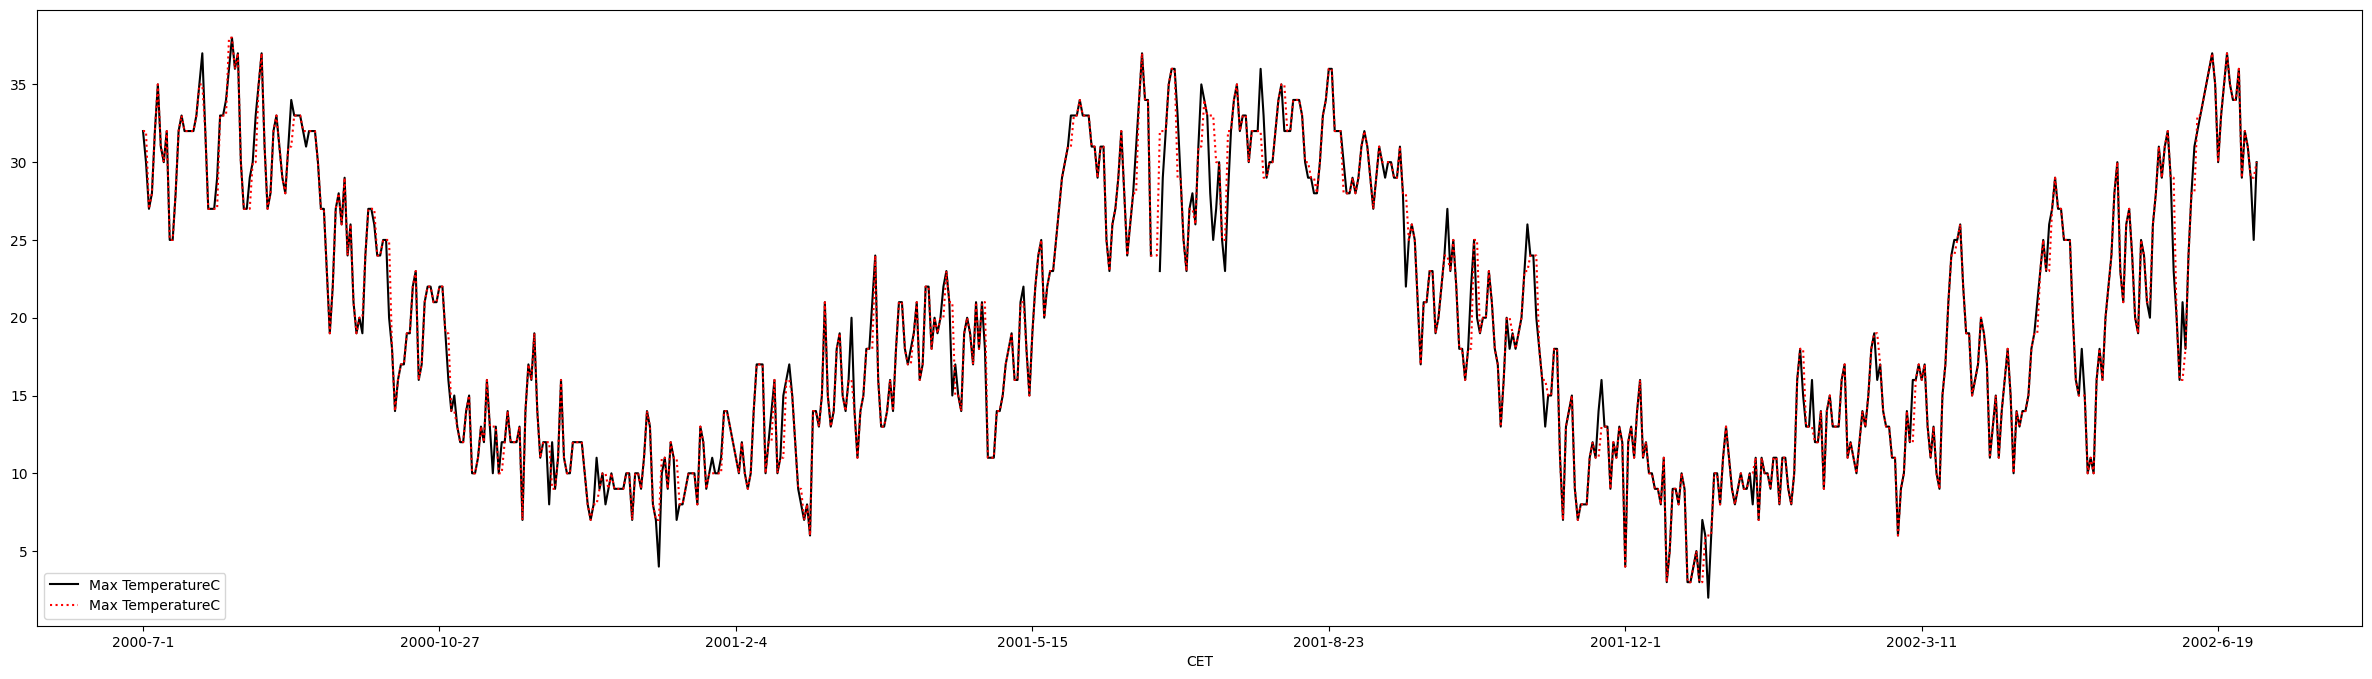

In [1103]:
# nearest
df_5 = pd.DataFrame()
df_5[['CET','Max TemperatureC']] = df[['CET','Max TemperatureC']]
df_5['Max TemperatureC'] = df_5['Max TemperatureC'].interpolate(method = 'nearest')
ax = df_total.plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_5.plot(x = 'CET', y = 'Max TemperatureC', color='red',linestyle ='dotted',figsize=(30, 8),ax = ax)
plt.show()

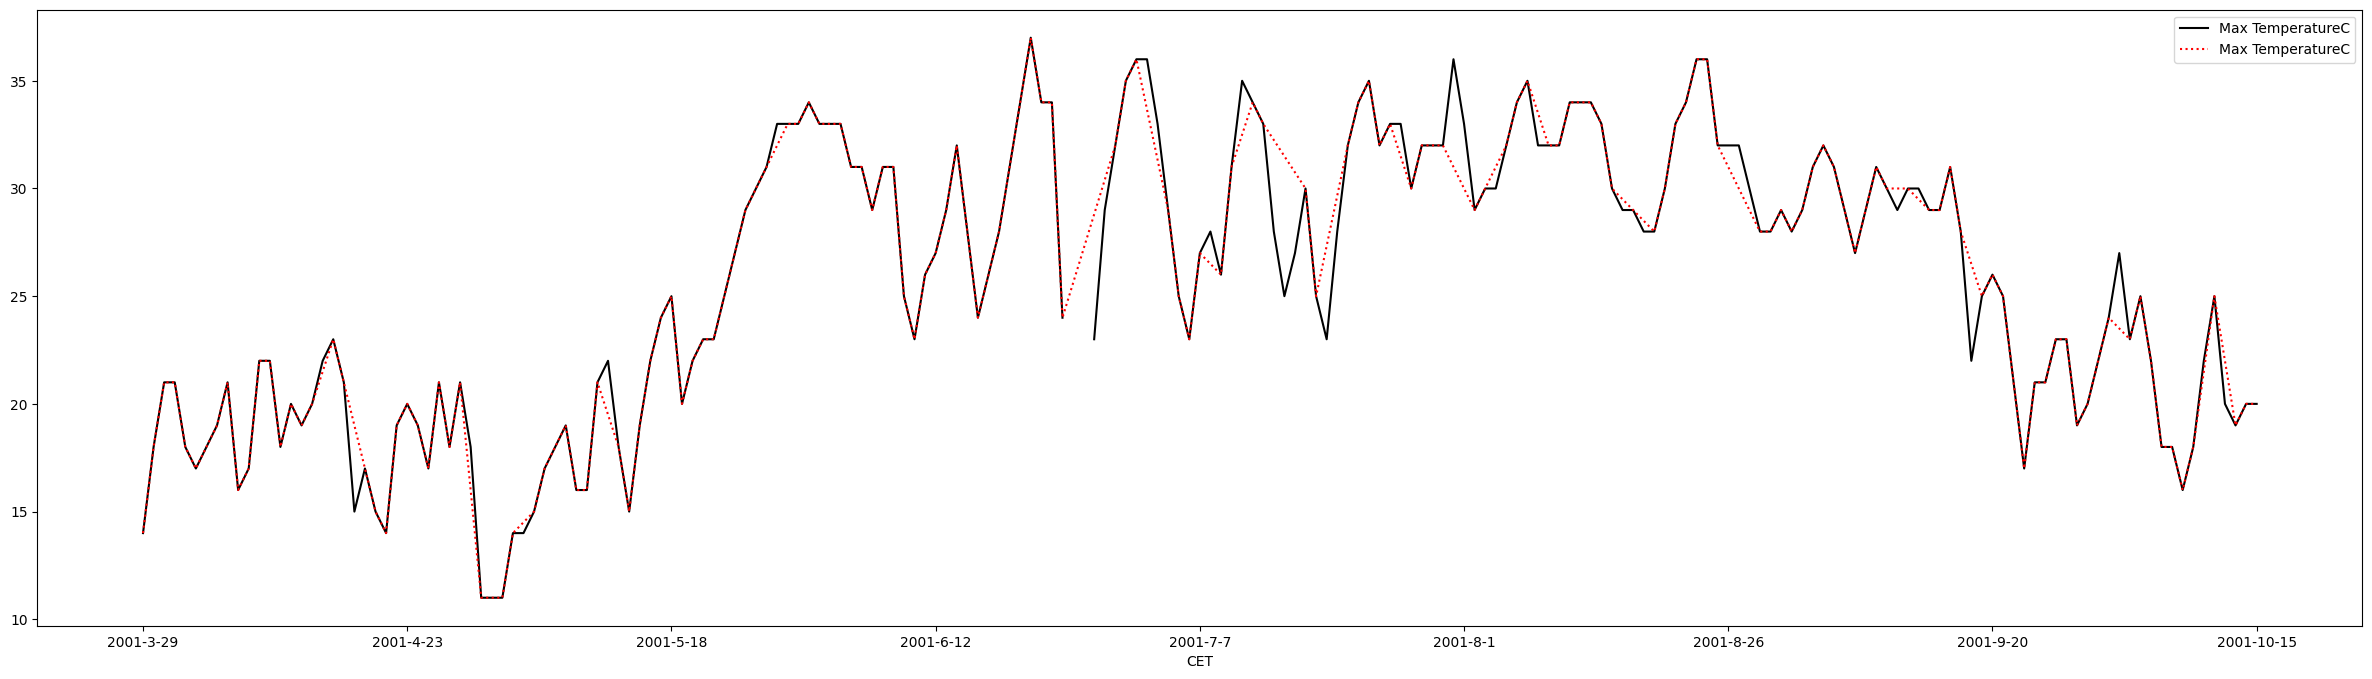

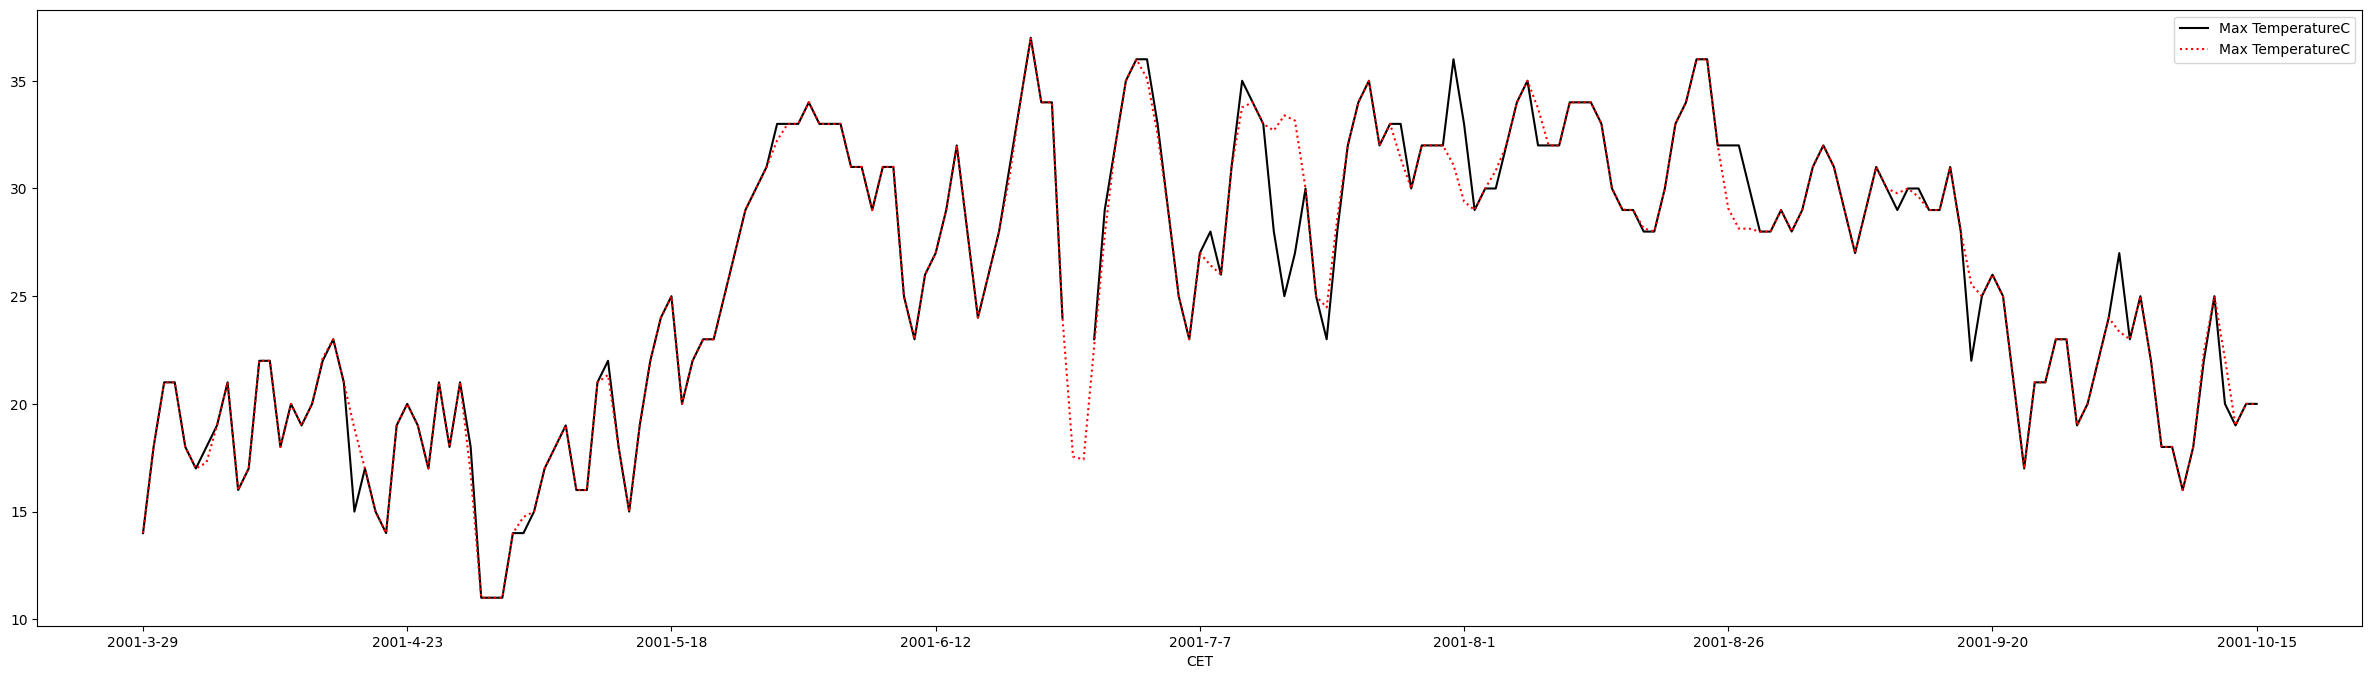

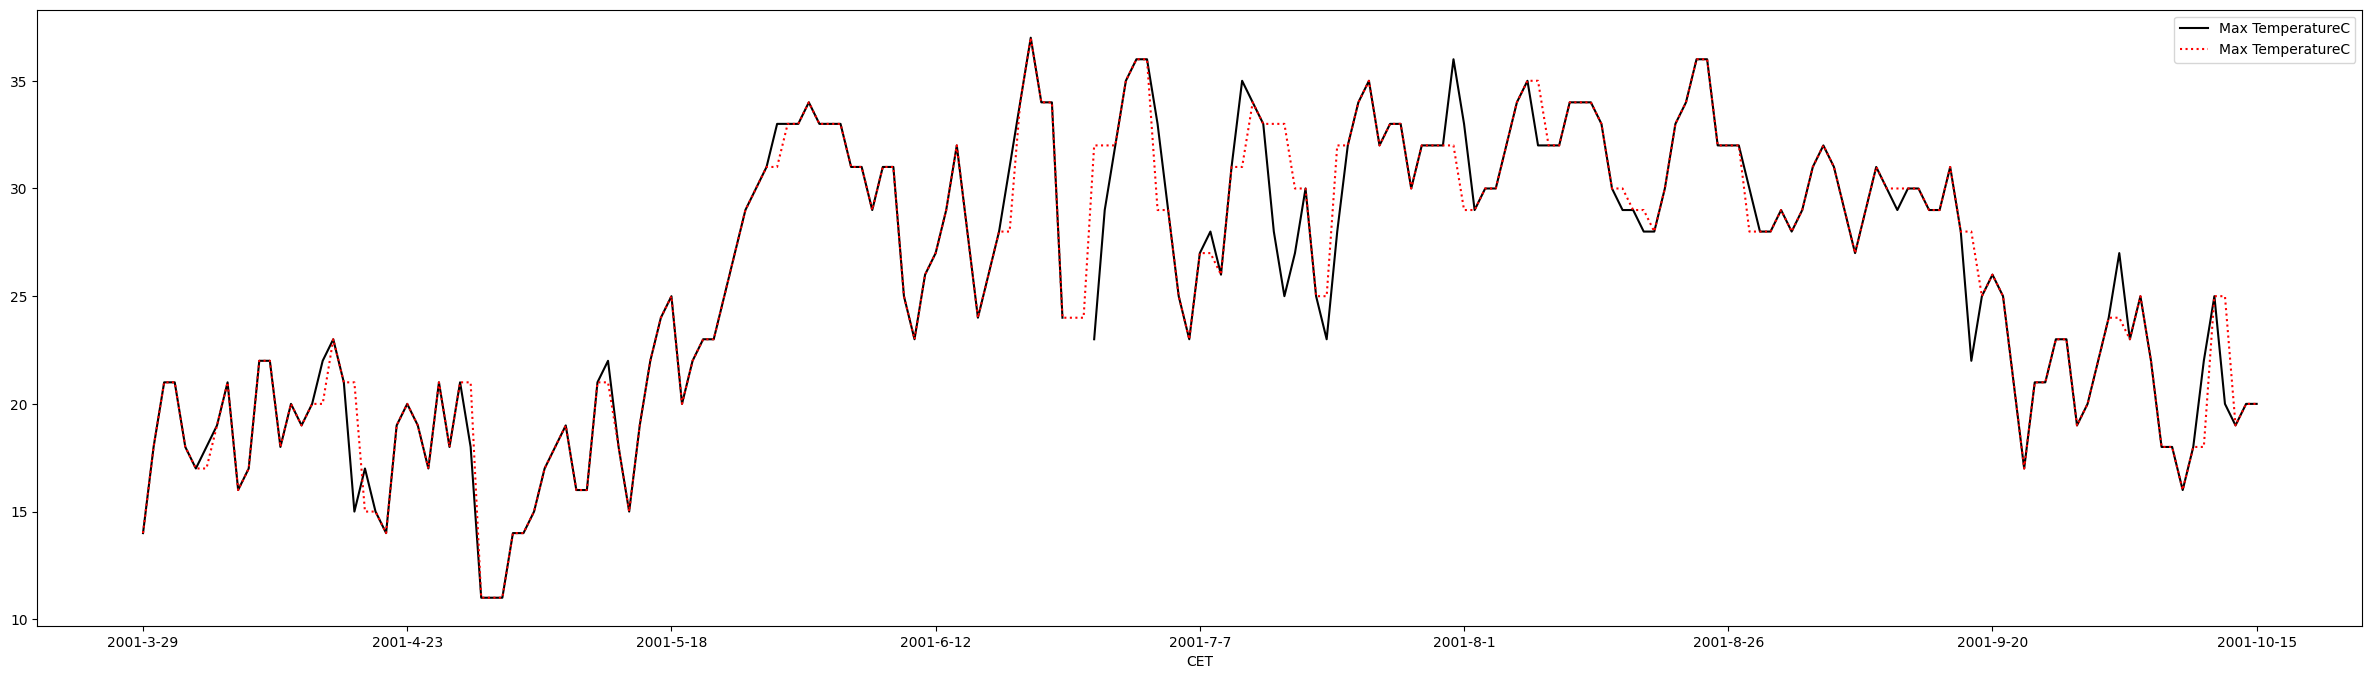

In [1104]:
ax = df_total.loc[1451:1651].plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_3.loc[1451:1651].plot(x = 'CET', y = 'Max TemperatureC', color='red',linestyle ='dotted',figsize=(30, 8),ax = ax)
ax = df_total.loc[1451:1651].plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_4.loc[1451:1651].plot(x = 'CET', y = 'Max TemperatureC', color='red', linestyle ='dotted',figsize=(30, 8),ax = ax)
ax = df_total.loc[1451:1651].plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_5.loc[1451:1651].plot(x = 'CET', y = 'Max TemperatureC', color='red',linestyle ='dotted',figsize=(30, 8),ax = ax)
plt.show()

## KNN

In [1105]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [1106]:
df.isna().sum()

CET                    0
Max TemperatureC     102
Mean TemperatureC      3
Min TemperatureC       2
dtype: int64

In [1107]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.set_index('CET')
# df['Max TemperatureC'] = le.fit_transform(df['Max TemperatureC'])
# df['Mean TemperatureC'] = le.fit_transform(df['Mean TemperatureC'])
# df['Min TemperatureC'] = le.fit_transform(df['Min TemperatureC'])
df

,Max TemperatureC,Mean TemperatureC,Min TemperatureC
CET,,,
2000-7-1,32.0,24.0,17.0
2000-7-2,NaN,23.0,17.0
2000-7-3,27.0,22.0,18.0
2000-7-4,28.0,20.0,12.0
2000-7-5,32.0,22.0,12.0
...,...,...,...
2002-6-28,32.0,23.0,16.0
2002-6-29,31.0,23.0,16.0
2002-6-30,29.0,22.0,15.0


In [1108]:
df.isna().sum()
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)


In [1109]:

df_total.reset_index(drop=True, inplace=True)
df_imputed['CET'] = df_total['CET']
df_imputed

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,CET
0,32.000000,24.0,17.0,2000-7-1
1,30.666667,23.0,17.0,2000-7-2
2,27.000000,22.0,18.0,2000-7-3
3,28.000000,20.0,12.0,2000-7-4
4,32.000000,22.0,12.0,2000-7-5
...,...,...,...,...
709,32.000000,23.0,16.0,2002-6-28
710,31.000000,23.0,16.0,2002-6-29
711,29.000000,22.0,15.0,2002-6-30
712,23.666667,19.0,14.0,2002-7-1


In [1110]:
df.dtypes

Max TemperatureC     float64
Mean TemperatureC    float64
Min TemperatureC     float64
dtype: object

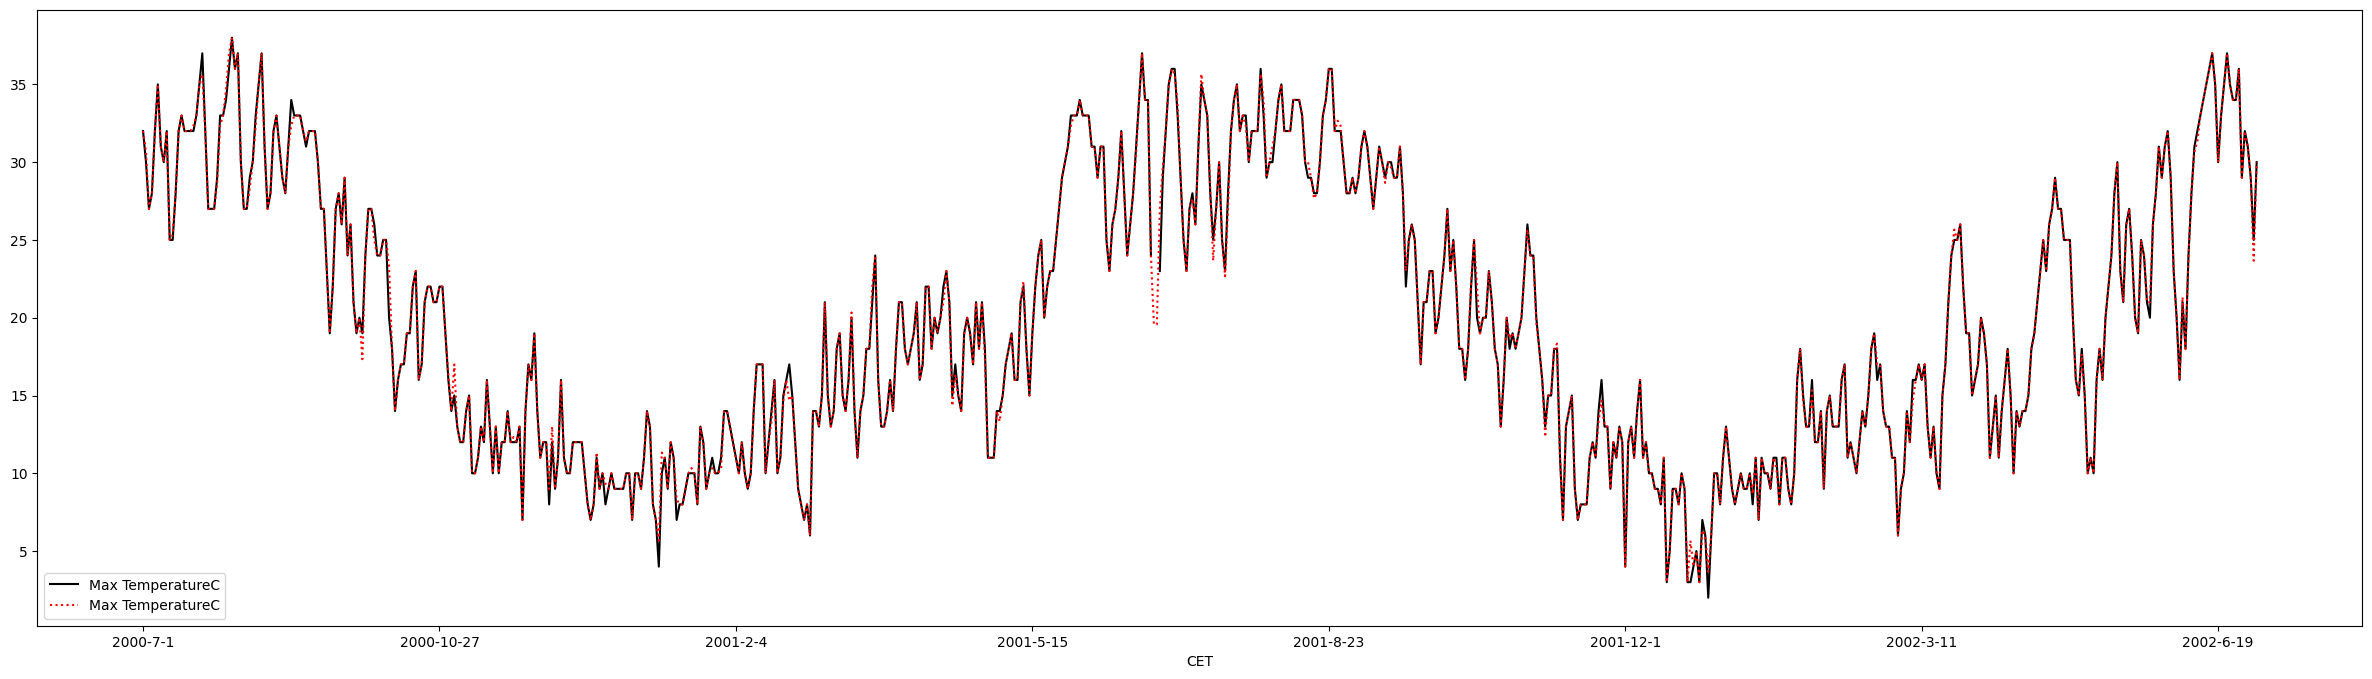

In [1111]:

ax = df_total.plot(x = 'CET', y = 'Max TemperatureC', color='black',figsize=(30, 8))
df_imputed.plot(x = 'CET', y = 'Max TemperatureC', color='red',linestyle ='dotted',figsize=(30, 8),ax = ax)
plt.show()